In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.outliers_influence import variance_inflation_factor
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('mtn_customer_churn.csv')

# Data Overview

*   The 690 missing values in the 'reasons\_for\_churn' column shows active customers.

In [ ]:
df.shape

(974, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer ID                974 non-null    object 
 1   Full Name                  974 non-null    object 
 2   Date of Purchase           974 non-null    object 
 3   Age                        974 non-null    int64  
 4   State                      974 non-null    object 
 5   MTN Device                 974 non-null    object 
 6   Gender                     974 non-null    object 
 7   Satisfaction Rate          974 non-null    int64  
 8   Customer Review            974 non-null    object 
 9   Customer Tenure in months  974 non-null    int64  
 10  Subscription Plan          974 non-null    object 
 11  Unit Price                 974 non-null    int64  
 12  Number of Times Purchased  974 non-null    int64  
 13  Total Revenue              974 non-null    int64  

In [ ]:
df.columns

Index(['Customer ID', 'Full Name', 'Date of Purchase', 'Age', 'State',
       'MTN Device', 'Gender', 'Satisfaction Rate', 'Customer Review',
       'Customer Tenure in months', 'Subscription Plan', 'Unit Price',
       'Number of Times Purchased', 'Total Revenue', 'Data Usage',
       'Customer Churn Status', 'Reasons for Churn'],
      dtype='object')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
df.head()

,customer_id,full_name,date_of_purchase,age,state,mtn_device,gender,satisfaction_rate,customer_review,customer_tenure_in_months,subscription_plan,unit_price,number_of_times_purchased,total_revenue,data_usage,customer_churn_status,reasons_for_churn
0,CUST0001,Ngozi Berry,Jan-25,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation
1,CUST0002,Zainab Baker,Mar-25,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors
2,CUST0003,Saidu Evans,Mar-25,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,NaN
3,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,NaN
4,CUST0003,Saidu Evans,Mar-25,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,NaN


In [ ]:
# descriptive statistics for numerical columns
df.describe()

,age,satisfaction_rate,customer_tenure_in_months,unit_price,number_of_times_purchased,total_revenue,data_usage
count,974.000000,974.000000,974.000000,974.000000,974.000000,9.740000e+02,974.000000
mean,48.043121,2.947639,31.422998,19196.663244,10.564682,2.046696e+05,99.304764
std,17.764307,1.384219,17.191256,25586.726985,5.709427,3.247855e+05,57.739511
min,16.000000,1.000000,1.000000,350.000000,1.000000,3.500000e+02,0.820000
25%,32.000000,2.000000,17.000000,5500.000000,5.000000,3.300000e+04,47.637500
50%,49.000000,3.000000,31.000000,14500.000000,11.000000,1.080000e+05,103.330000
75%,63.750000,4.000000,47.000000,24000.000000,15.000000,2.610000e+05,149.697500
max,80.000000,5.000000,60.000000,150000.000000,20.000000,3.000000e+06,200.000000


In [ ]:
df.isnull().sum()

,0
customer_id,0
full_name,0
date_of_purchase,0
age,0
state,0
mtn_device,0
gender,0
satisfaction_rate,0
customer_review,0
customer_tenure_in_months,0


In [ ]:
print("There's 690 missing values for reason of churn")

There's 690 missing values for reason of churn


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# dropping the customer_id since full_name can serve the same need
df.drop("customer_id", axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

To explore the data and find relevant business insights.

# Discovering Business insights

In [ ]:
#to group the DataFrame by the 'mtn_device' column
product_type = df.groupby("mtn_device")
churn_status = df["customer_churn_status"]

In [ ]:
#keys of the grouped object, which represent the unique MTN device types
pd.DataFrame(product_type.groups.keys())

,0
0,4G Router
1,5G Broadband Router
2,Broadband MiFi
3,Mobile SIM Card


                     count    min      max        sum
mtn_device                                           
5G Broadband Router    229  18000  3000000  100818000
Broadband MiFi         228   9000   600000   48067500
4G Router              216   4500   700000   37028000
Mobile SIM Card        301    350   595000   13434700


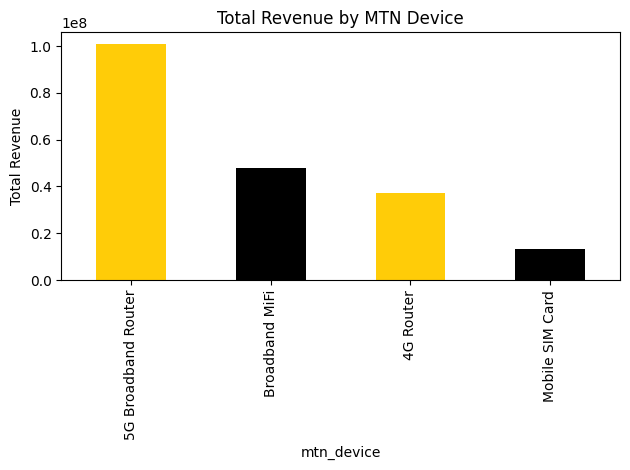

In [ ]:
# To return the first row of each group
#product_type.first()
#And Summarizing and finding out the total sum of revenue generated from each product type
product_summary = product_type["total_revenue"].agg(['count','min', 'max', 'sum']).sort_values(by='sum', ascending=False)
print(product_summary)
product_summary['sum'].plot(kind='bar', ylabel='Total Revenue', title= 'Total Revenue by MTN Device',color=["#FFCC08","black"])
plt.tight_layout()
plt.show()

customer_churn_status
No     690
Yes    284
Name: count, dtype: int64


<Axes: title={'center': 'Churned Vs Non-churned Customer'}, xlabel='customer_churn_status', ylabel='Count'>

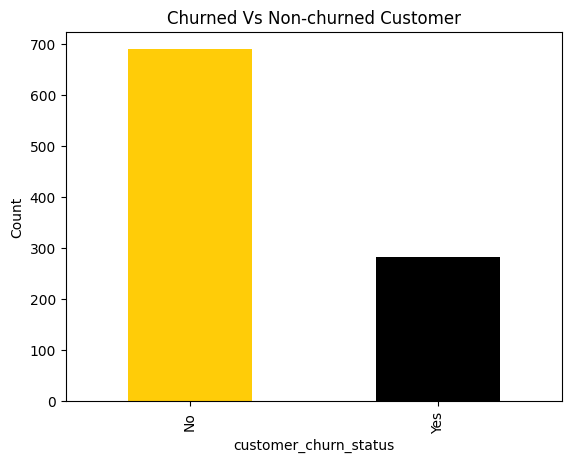

In [ ]:
#to show the count of each customer churn status (Yes/No)
print(churn_status.value_counts())
# a bar chart showing the count of churned and non-churned customers
churn_status.value_counts().plot(kind='bar', title='Churned Vs Non-churned Customer', ylabel="Count",color=["#FFCC08","black"])

subscription_plan
60GB Monthly Broadband Plan     81
150GB FUP Monthly Unlimited     78
30GB Monthly Broadband Plan     77
165GB Monthly Plan              73
300GB FUP Monthly Unlimited     72
120GB Monthly Broadband Plan    68
10GB+10mins Monthly Plan        67
65GB Monthly Plan               63
25GB Monthly Plan               49
12.5GB Monthly Plan             38
3.2GB 2-Day Plan                35
200GB Monthly Broadband Plan    31
16.5GB+10mins Monthly Plan      30
2.5GB 2-Day Plan                30
1.5GB 2-Day Plan                29
500MB Daily Plan                29
7GB Monthly Plan                27
450GB 3-Month Broadband Plan    25
1.5TB Yearly Broadband Plan     25
1GB+1.5mins Daily Plan          24
20GB Monthly Plan               23
Name: count, dtype: int64


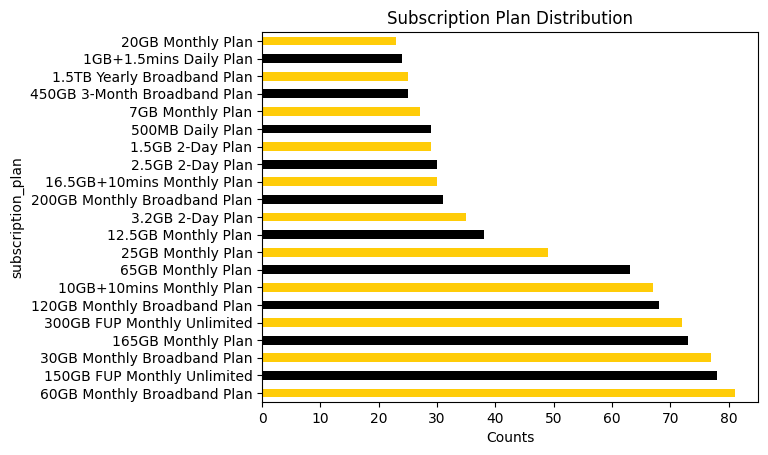

In [ ]:
# the value counts of each subscription plan
print(df['subscription_plan'].value_counts())
# a horizontal bar chart showing the count of each subscription plan
df['subscription_plan'].value_counts().plot(kind="barh",title=('Subscription Plan Distribution'),xlabel="Counts",color=["#FFCC08","black"])
plt.show()

In [ ]:
# the total sum of the 'total_revenue' column
print(f"Total Amount of Money generated is : N{df['total_revenue'].sum()}M")

Total Amount of Money generated is : N199348200M


In [ ]:
# Converting the 'date_of_purchase' column to datetime objects
df['date_of_purchase']=pd.to_datetime(df['date_of_purchase'], format='%b-%y')

In [ ]:
#changing datetime to it prospective month name
df["month_of_purchase"] = df["date_of_purchase"].dt.month_name()

<Axes: title={'center': 'Trend on subscription between the months'}, xlabel='date_of_purchase'>

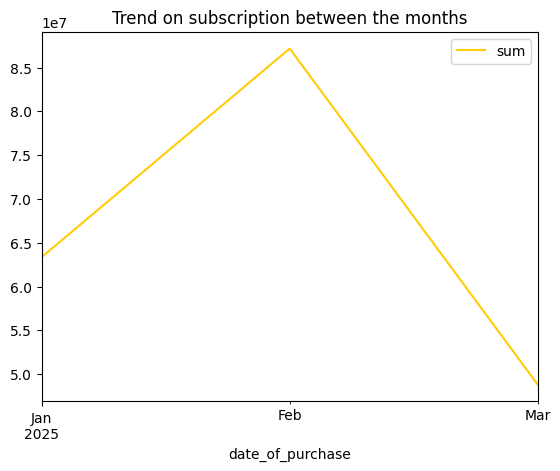

In [ ]:
# Grouping the DataFrame by 'date_of_purchase' and calculate the count and sum of 'total_revenue' for each month
monthly_trend = df.groupby('date_of_purchase')['total_revenue'].agg(['count', 'sum'])
# a line chart showing the total revenue trend over the months
monthly_trend['sum'].plot(kind='line', color="#FFCC08",legend=True , title='Trend on subscription between the months')

In [ ]:
# grouping the DataFrame by 'full_name' and 'number_of_times_purchased' and calculate the sum of 'total_revenue' by each custom
cust_summary = df.groupby(['full_name','number_of_times_purchased'])['total_revenue'].agg('sum')
top_customer = cust_summary.sort_values(ascending=False)
top_customer.head(5)

,,total_revenue
full_name,number_of_times_purchased,
Alabo Turner,20,3000000
Halima Martin,20,3000000
Chinedu Brown,19,2850000
Kunle Myers,19,2850000
Amina Johns,16,2400000


state
Plateau    9463600
Ekiti      9240250
Yobe       8881700
Oyo        8600350
Edo        7937650
Name: total_revenue, dtype: int64


<Axes: ylabel='state'>

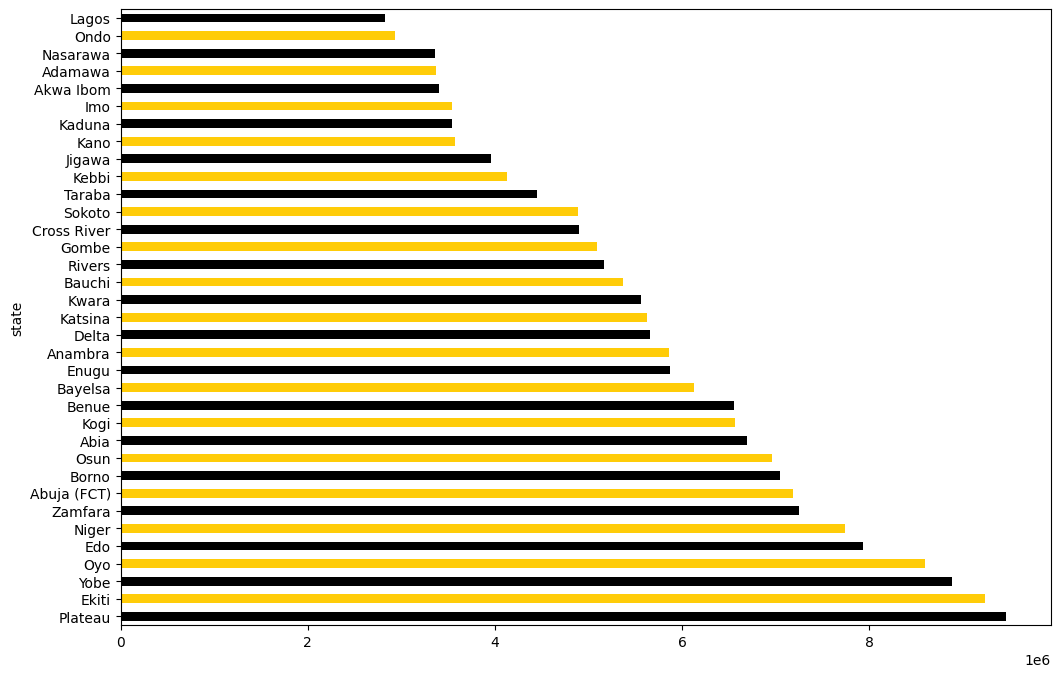

In [ ]:
# group the DataFrame by 'state' and calculate the sum of 'total_revenue'
rev_by_state = df.groupby("state")["total_revenue"].agg("sum").sort_values(ascending=False)
print(rev_by_state.head())
# a horizontal bar chart showing the total revenue by state
rev_by_state.plot(kind="barh", figsize=(12,8), color=['black', '#FFCC08'])

gender
Female    495
Male      479
Name: total_revenue, dtype: int64


<Axes: title={'center': 'Revenue by gender: female vs male'}, xlabel='gender'>

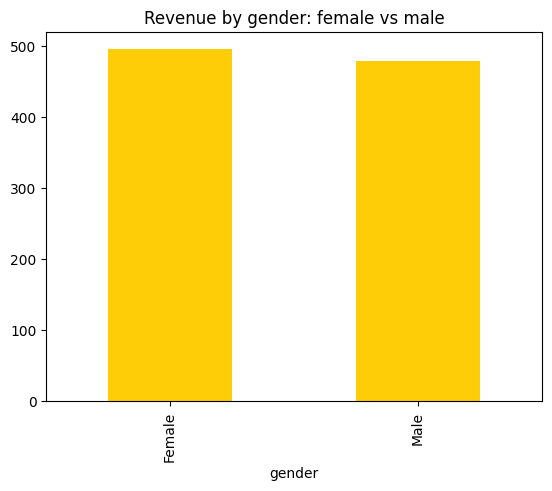

In [ ]:
# grouping the DataFrame by 'gender' and count the occurrences of each gender in 'total_revenue'
rev_by_gender = df.groupby("gender")["total_revenue"].count()
print(rev_by_gender)
# a bar chart showing the revenue count by gender
rev_by_gender.plot(kind="bar",color="#FFCC08", title="Revenue by gender: female vs male")

gender                        Female  Male
subscription_plan                         
1.5GB 2-Day Plan                  20     9
1.5TB Yearly Broadband Plan       14    11
10GB+10mins Monthly Plan          43    24
12.5GB Monthly Plan               23    15
120GB Monthly Broadband Plan      41    27
150GB FUP Monthly Unlimited       38    40
16.5GB+10mins Monthly Plan        17    13
165GB Monthly Plan                37    36
1GB+1.5mins Daily Plan             9    15
2.5GB 2-Day Plan                  14    16
200GB Monthly Broadband Plan      16    15
20GB Monthly Plan                 11    12
25GB Monthly Plan                 22    27
3.2GB 2-Day Plan                  15    20
300GB FUP Monthly Unlimited       38    34
30GB Monthly Broadband Plan       35    42
450GB 3-Month Broadband Plan      12    13
500MB Daily Plan                  11    18
60GB Monthly Broadband Plan       41    40
65GB Monthly Plan                 28    35
7GB Monthly Plan                  10    17


<Figure size 1200x1000 with 0 Axes>

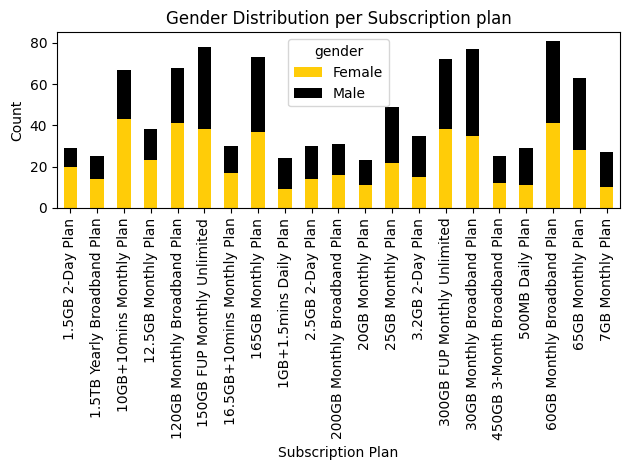

In [ ]:
# grouping the DataFrame by 'subscription_plan' and 'gender'
sub_plan_gender = df.groupby('subscription_plan')['gender'].value_counts().unstack(fill_value =0)
# showing gender distribution per subscription plan
print(sub_plan_gender)
plt.figure(figsize=(12, 10))
sub_plan_gender.plot(kind='bar',color=["#FFCC08","black"],stacked=True)
plt.xticks(rotation=90)
plt.xlabel('Subscription Plan')
plt.ylabel('Count')
plt.title("Gender Distribution per Subscription plan")
plt.tight_layout()
plt.show()

In [ ]:
# Calculating the average amount of subscription plans
avg_amount = sum(df.unit_price)/len(df.unit_price)
print(f"The average amount of subscription by the customers is: N{avg_amount}")
below_avg=sum(1 for x in df.unit_price if x < avg_amount)
# a Count of the number of customers subscribing above the average amount
above_avg=sum(1 for x in df.unit_price if x > avg_amount)
print(f"The total number of customers subscribing below the average amount is:{below_avg}\n And above the average amount is: {above_avg}")

The average amount of subscription by the customers is: N19196.66324435318
The total number of customers subscribing below the average amount is:602
 And above the average amount is: 372


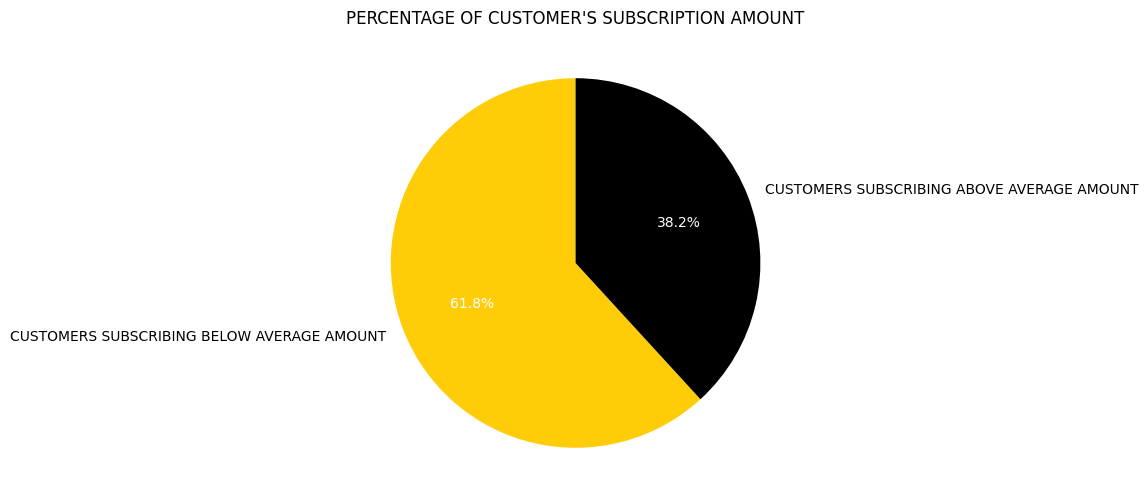

In [ ]:
# a pie chart to show customers below and above average subscription amount
values=[below_avg, above_avg]
plt.figure(figsize=(12,6))
patches, texts, autotexts = plt.pie(values,colors=["#FFCC08","black"],labels=["CUSTOMERS SUBSCRIBING BELOW AVERAGE AMOUNT", "CUSTOMERS SUBSCRIBING ABOVE AVERAGE AMOUNT"], startangle=90, autopct='%.1f%%')
plt.title("PERCENTAGE OF CUSTOMER'S SUBSCRIPTION AMOUNT")
for autotext in autotexts:
    autotext.set_color('white')
plt.show()

# Detailed Exploratory Data Analysis (EDA)

### *Categorical Variables and Churn Status*

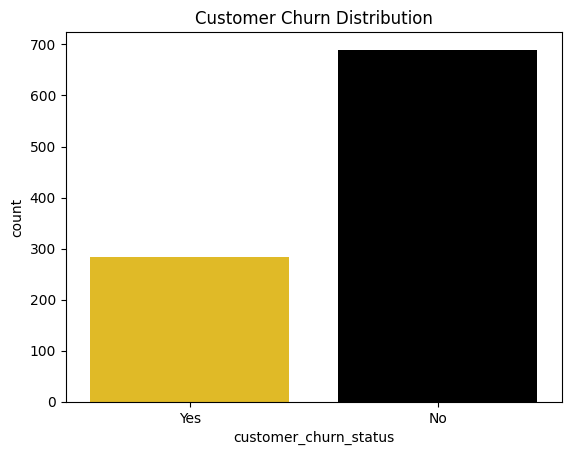

In [ ]:
sns.countplot(x="customer_churn_status",data=df, hue="customer_churn_status", palette=["#FFCC08","black"], legend=False)
plt.title("Customer Churn Distribution")
plt.show()

In [ ]:
categorical_cols = df.select_dtypes(object).drop(['full_name','customer_churn_status'],axis=1)
categorical_cols.tail()

,state,mtn_device,gender,customer_review,subscription_plan,reasons_for_churn,month_of_purchase
969,Osun,4G Router,Female,Good,25GB Monthly Plan,NaN,January
970,Bayelsa,5G Broadband Router,Female,Fair,30GB Monthly Broadband Plan,NaN,March
971,Kebbi,4G Router,Male,Very Good,165GB Monthly Plan,High Call Tarriffs,February
972,Kebbi,Mobile SIM Card,Male,Very Good,7GB Monthly Plan,High Call Tarriffs,February
973,Kebbi,Broadband MiFi,Male,Very Good,150GB FUP Monthly Unlimited,High Call Tarriffs,February


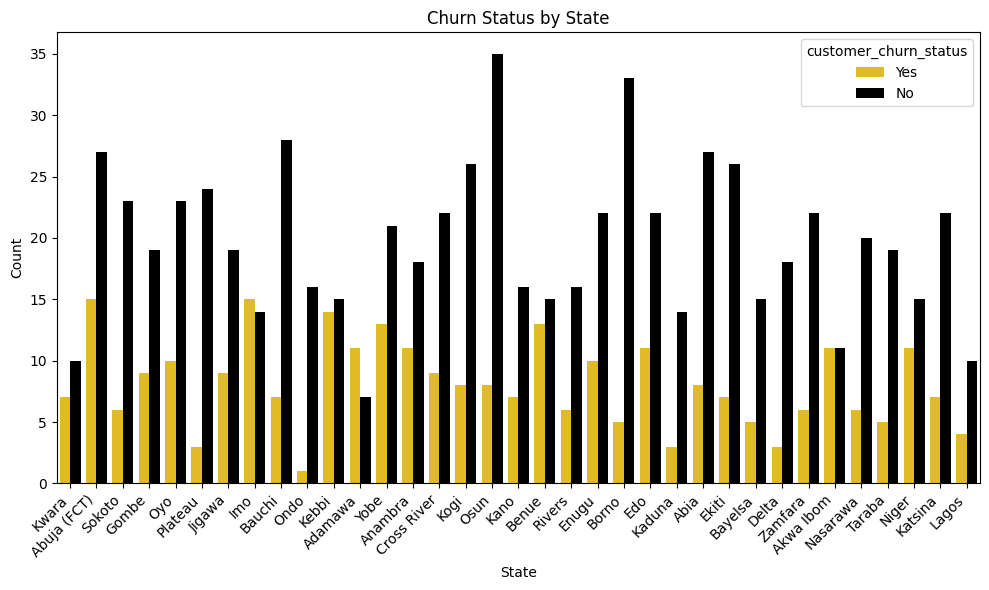

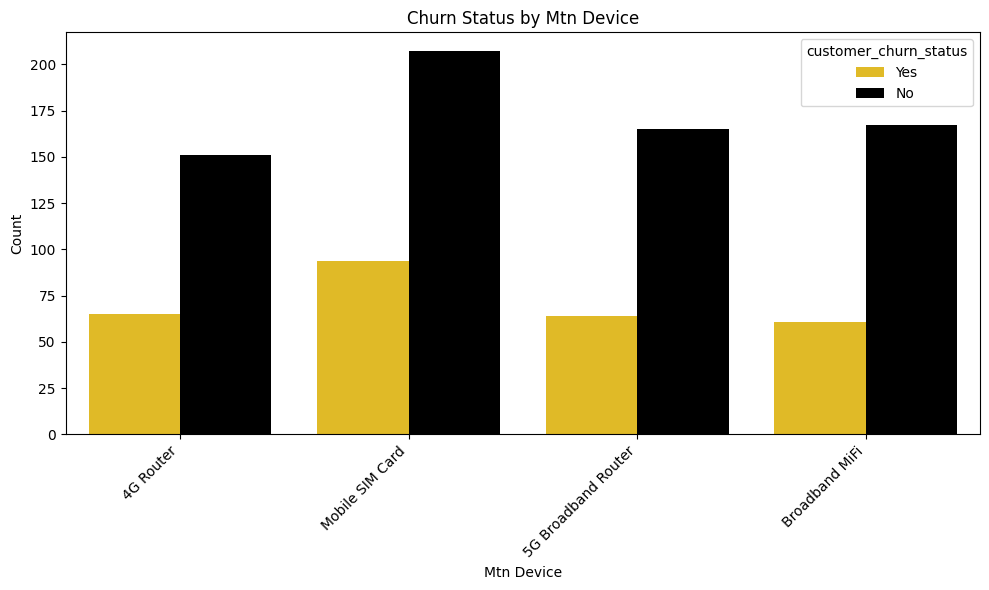

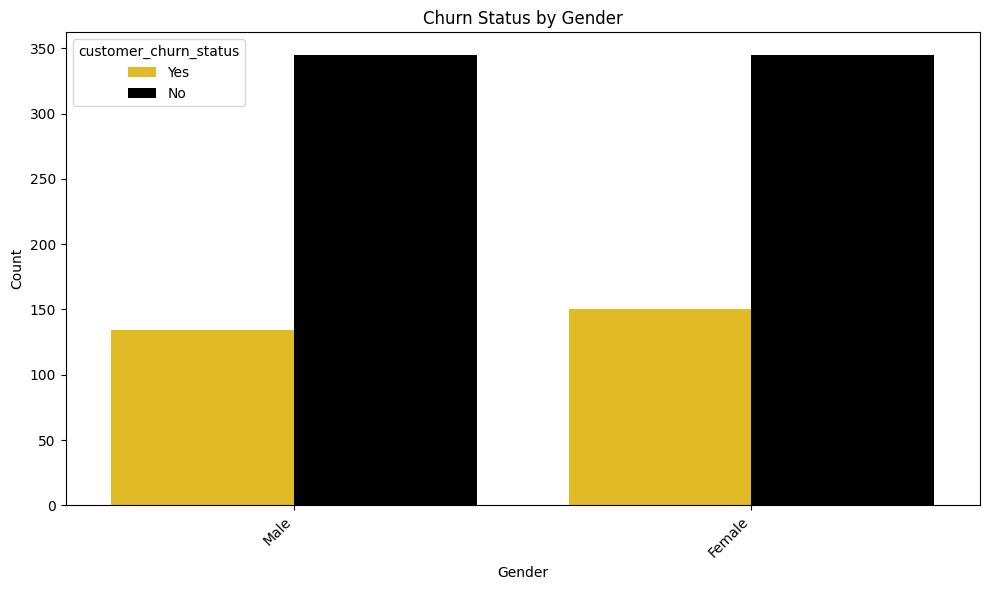

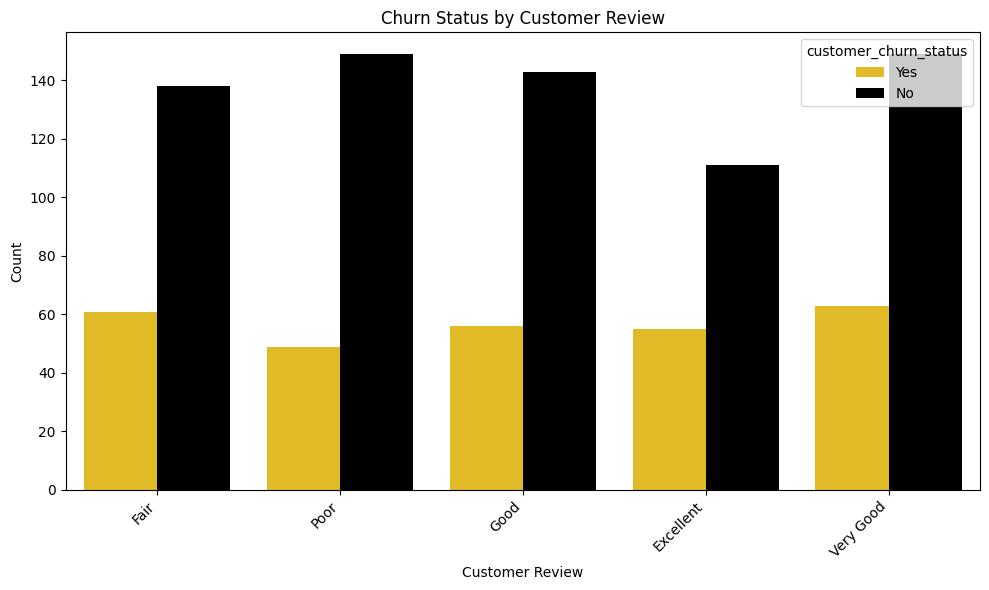

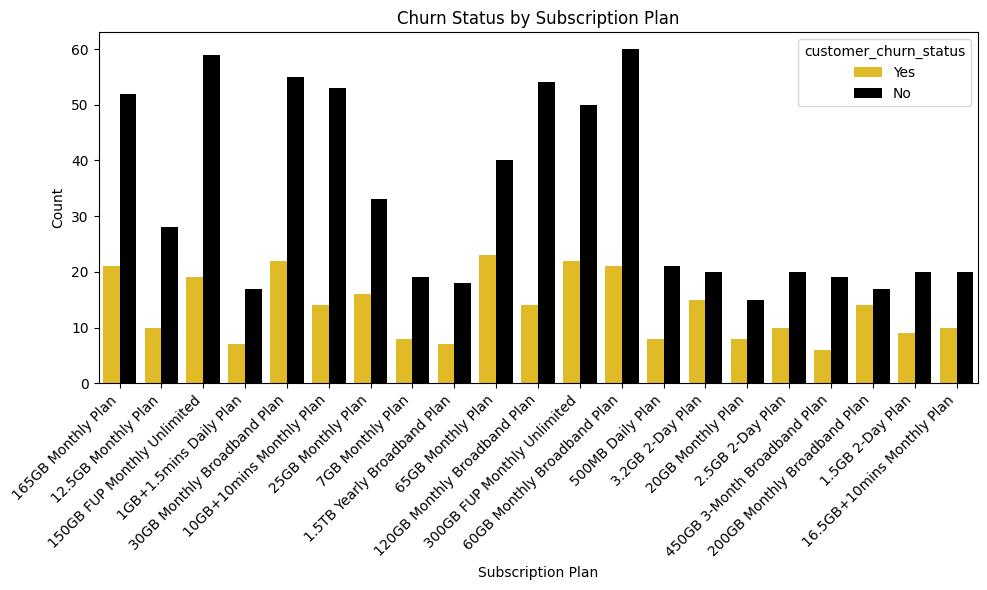

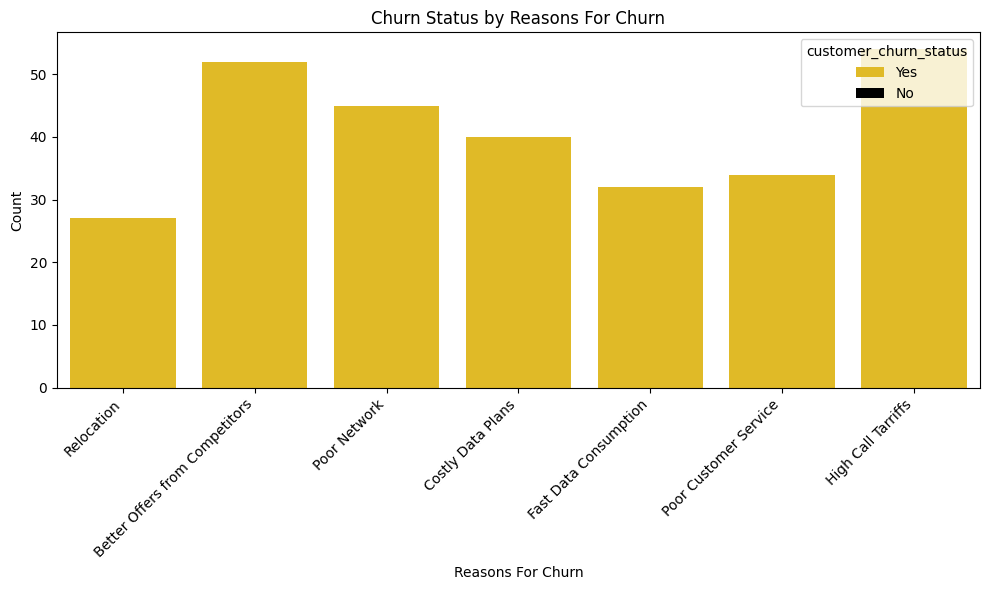

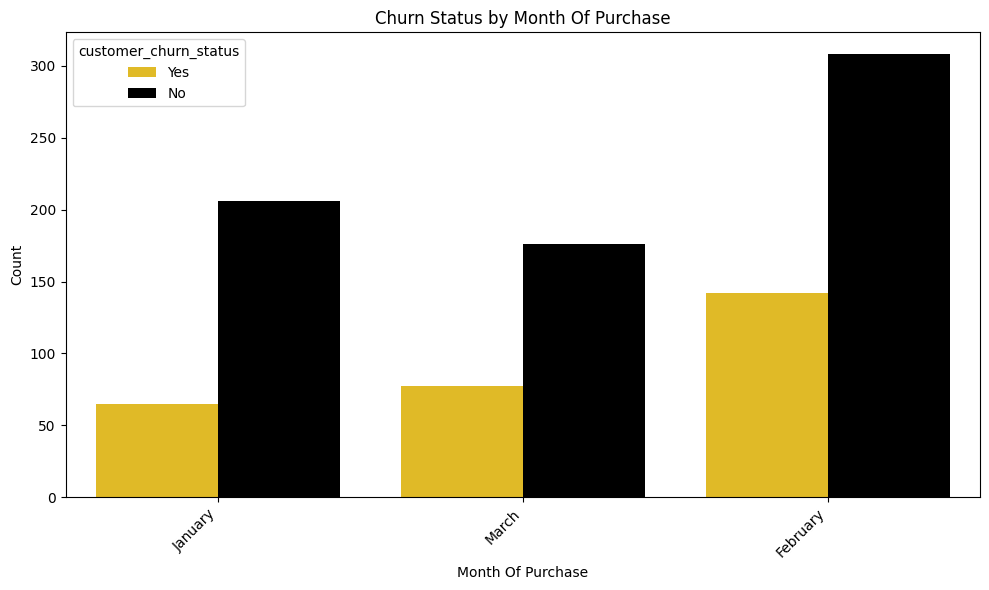

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='customer_churn_status', palette=["#FFCC08", "black"])
    plt.title(f'Churn Status by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

reasons_for_churn
still active                      690
High Call Tarriffs                 54
Better Offers from Competitors     52
Poor Network                       45
Costly Data Plans                  40
Poor Customer Service              34
Fast Data Consumption              32
Relocation                         27
Name: count, dtype: int64


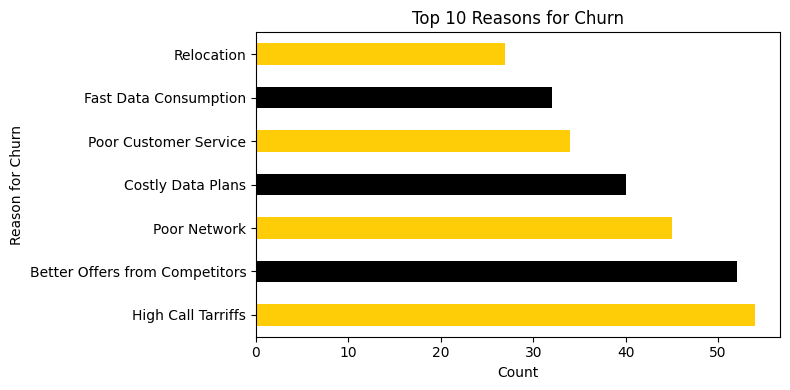

In [ ]:
# value counts of the 'reasons_for_churn' column
df['reasons_for_churn'].fillna('still active', inplace=True)
print(df['reasons_for_churn'].value_counts())
# a bar chart of the top 10 reasons for churn
df['reasons_for_churn'].value_counts()[df['reasons_for_churn'].value_counts().index != 'still active'].head(10).plot(kind='barh', title='Top 10 Reasons for Churn', xlabel='Count', ylabel='Reason for Churn', color=["#FFCC08","black"],figsize=(8,4))
plt.tight_layout()
plt.show()

### Numerical Variables and Churn Status

In [ ]:
# Map 'Yes' to 1 and 'No' to 0 in the 'customer_churn_status' column and creating a new column 'churn_flag'
df['churn_flag'] = df["customer_churn_status"].map({'Yes': 1, 'No': 0})

In [ ]:
numerical_cols = df.select_dtypes(np.number)
sub_num_col=df[['satisfaction_rate','unit_price','number_of_times_purchased']]

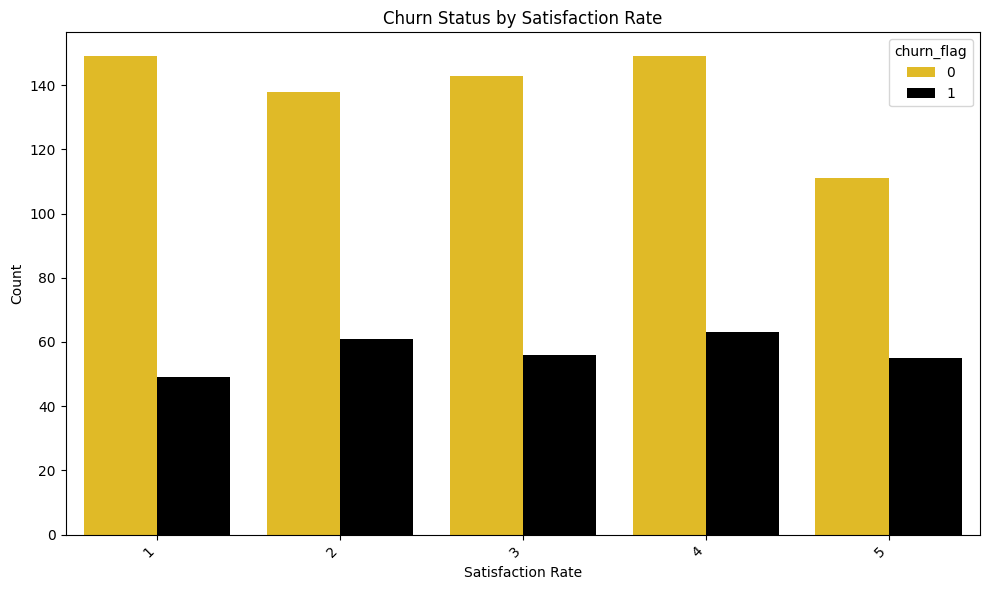

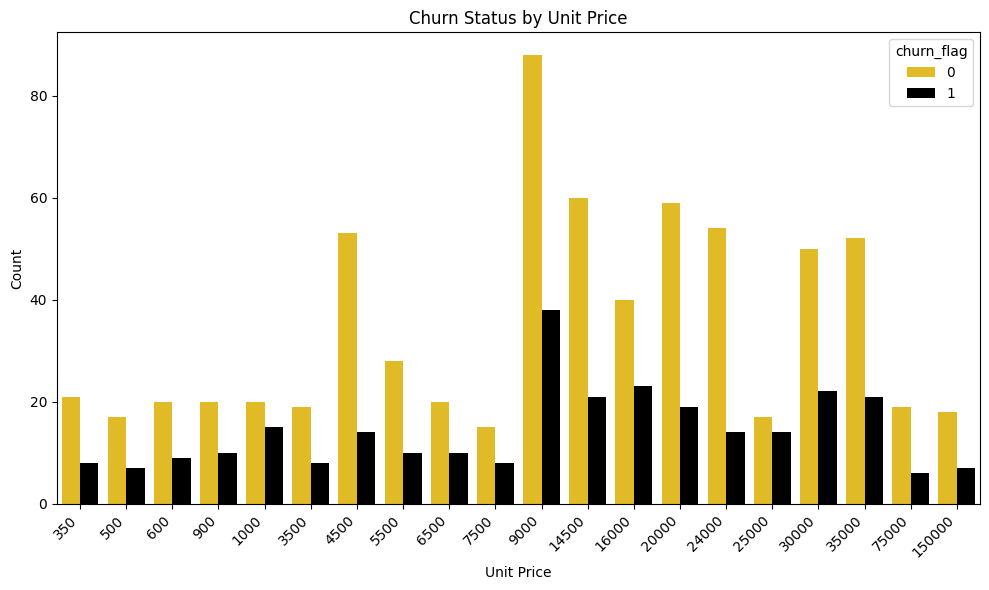

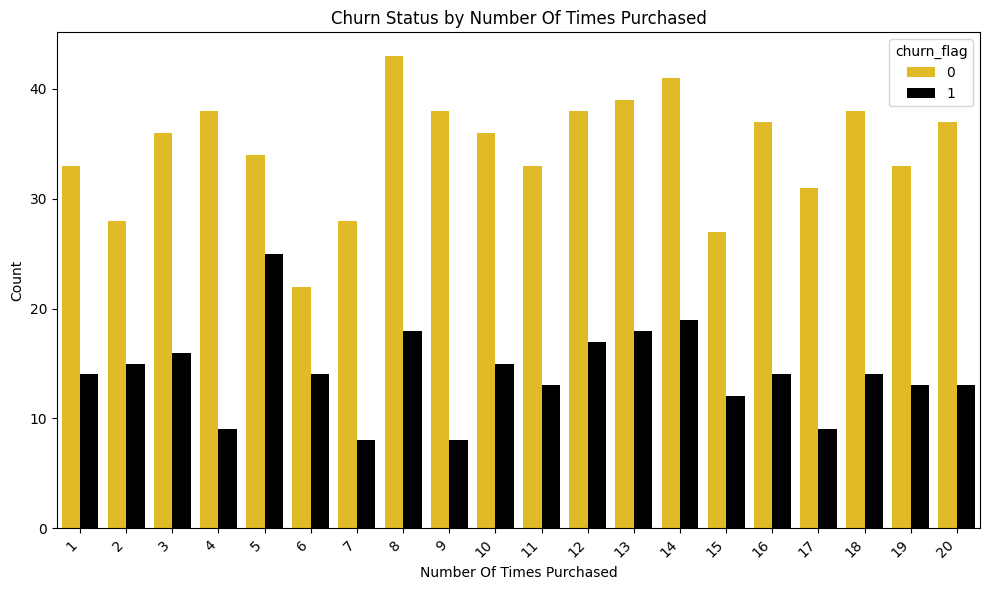

In [ ]:
for col in sub_num_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='churn_flag', palette=["#FFCC08", "black"])
    plt.title(f'Churn Status by {col.replace("_", " ").title()}')
    plt.xlabel(col.replace("_", " ").title())
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

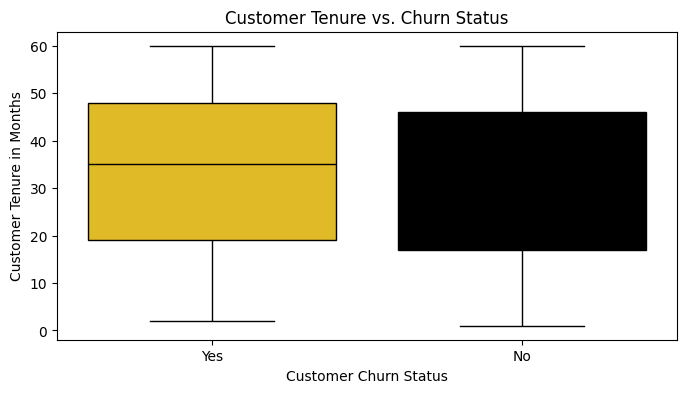

In [ ]:
plt.figure(figsize=(8, 4))
# to create a box plot to visualize the distribution of customer tenure for churned and non-churned customers
sns.boxplot(data=df, x='customer_churn_status', y='customer_tenure_in_months', hue='customer_churn_status', palette=["#FFCC08", "black"], legend=False)
plt.title('Customer Tenure vs. Churn Status')
plt.xlabel('Customer Churn Status')
plt.ylabel('Customer Tenure in Months')
plt.show()

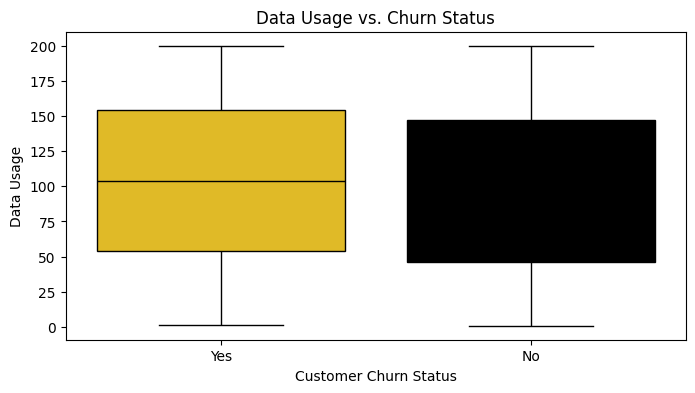

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='customer_churn_status', y='data_usage', hue='customer_churn_status', palette=["#FFCC08", "black"], legend=False)
plt.title('Data Usage vs. Churn Status')
plt.xlabel('Customer Churn Status')
plt.ylabel('Data Usage')
plt.show()

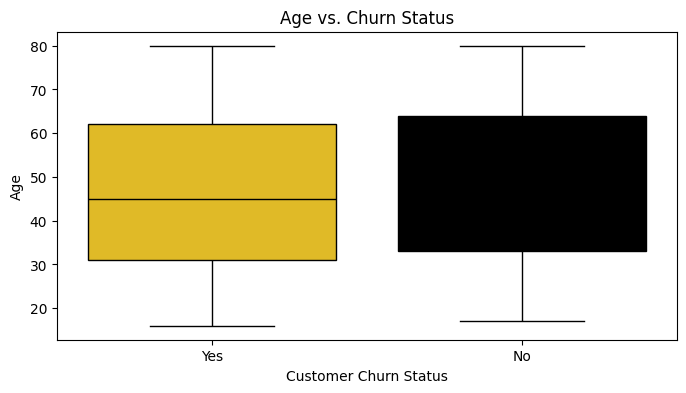

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='customer_churn_status', y='age', hue='customer_churn_status', palette=["#FFCC08", "black"], legend=False)
plt.title('Age vs. Churn Status')
plt.xlabel('Customer Churn Status')
plt.ylabel('Age')
plt.show()

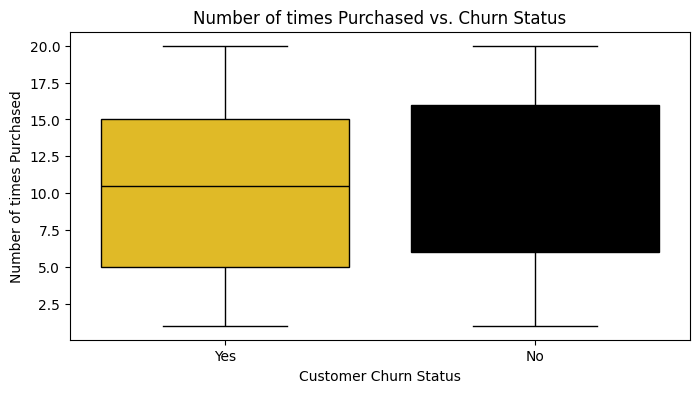

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='customer_churn_status', y='number_of_times_purchased', hue='customer_churn_status', palette=["#FFCC08", "black"], legend=False)
plt.title('Number of times Purchased vs. Churn Status')
plt.xlabel('Customer Churn Status')
plt.ylabel('Number of times Purchased')
plt.show()

## Insights from Categorical Variables and Churn Status

In [ ]:
churn = df['customer_churn_status']
# Create results list
results = []

In [ ]:
# a loop to analyze each categorical variable
print("="*20 + "ANALYSIS RESULTS" + "="*20)

for col in categorical_cols:
    print(f"\nAnalyzing: {col}")
    print("-" * 30)

    # 1. Calculate p-value (Chi-square test)
    crosstab = pd.crosstab(df[col], churn)
    chi2, p_value, dof, expected = chi2_contingency(crosstab)

    # 2. Calculate Cramer's V
    confusion_matrix = pd.crosstab(df[col], churn)
    chi2_cramers = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    cramers_v_score = np.sqrt(chi2_cramers / (n * min(confusion_matrix.shape) - n))

    # Print results
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Statistically significant!")
    else:
        print("Not statistically significant")

    print(f"Cramer's V: {cramers_v_score:.3f}")
    if cramers_v_score > 0.3:
        print("Strong relationship!")
    elif cramers_v_score > 0.1:
        print("Moderate relationship")
    else:
        print("Very Weak relationship")

    # to store the results
    results.append({
        'Feature': col,
        'P_value': p_value,
        'Cramers_V': cramers_v_score,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

====================ANALYSIS RESULTS====================

Analyzing: state
------------------------------
P-value: 0.0016
Statistically significant!
Cramer's V: 0.255
Moderate relationship

Analyzing: mtn_device
------------------------------
P-value: 0.6784
Not statistically significant
Cramer's V: 0.039
Very Weak relationship

Analyzing: gender
------------------------------
P-value: 0.4662
Not statistically significant
Cramer's V: 0.023
Very Weak relationship

Analyzing: customer_review
------------------------------
P-value: 0.4807
Not statistically significant
Cramer's V: 0.060
Very Weak relationship

Analyzing: subscription_plan
------------------------------
P-value: 0.6921
Not statistically significant
Cramer's V: 0.130
Moderate relationship

Analyzing: reasons_for_churn
------------------------------
P-value: 0.0000
Statistically significant!
Cramer's V: 1.000
Strong relationship!

Analyzing: month_of_purchase
------------------------------
P-value: 0.0836
Not statistically si

In [ ]:
# to create a table that summarises Correllations
print("\n" + "="*20 + "SUMMARY TABLE" + "="*20)

summary_df = pd.DataFrame(results)
summary_df = summary_df.sort_values('Cramers_V', ascending=False)
display(summary_df.round(4))

# to show the best features
print("\n" + "="*5 + "BEST CATEGORICAL FEATURES FOR PREDICTING CHURN" + "="*5)

best_features = summary_df[summary_df['Significant'] == 'Yes'].head(3)
for i, row in best_features.iterrows():
    print(f"{row['Feature']}: Cramer's V = {row['Cramers_V']:.3f}")


====================SUMMARY TABLE====================


,Feature,P_value,Cramers_V,Significant
5,reasons_for_churn,0.0000,1.0000,Yes
0,state,0.0016,0.2553,Yes
4,subscription_plan,0.6921,0.1297,No
6,month_of_purchase,0.0836,0.0714,No
3,customer_review,0.4807,0.0598,No
1,mtn_device,0.6784,0.0395,No
2,gender,0.4662,0.0233,No



=====BEST CATEGORICAL FEATURES FOR PREDICTING CHURN=====
reasons_for_churn: Cramer's V = 1.000
state: Cramer's V = 0.255


###### Insights from Categorical Variables and Churn Status

Based on the analysis of categorical variables and their relationship with churn status:

*   **Reasons for Churn:** This variable has the strongest relationship with churn (Cramer's V = 1.000).
*   **State:** The customer's state shows a moderate, statistically significant relationship with churn (Cramer's V = 0.255, p-value = 0.0016).
*   **Subscription Plan:** There is a moderate relationship with churn (Cramer's V = 0.130), although it is not statistically significant (p-value = 0.6921).
*   **Month of Purchase:** This variable has a weak relationship with churn (Cramer's V = 0.071) and is not statistically significant (p-value = 0.0836).
*   **Customer Review:** There is a weak relationship with churn (Cramer's V = 0.060) and it is not statistically significant (p-value = 0.4807).
*   **MTN Device:** This variable has a weak relationship with churn (Cramer's V = 0.039) and is not statistically significant (p-value = 0.6784).
*   **Gender:** There is a very weak relationship with churn (Cramer's V = 0.023) and it is not statistically significant (p-value = 0.4662).

**Key takeaway:** 'Reasons for Churn' and 'State' are the most notable categorical features in predicting churn, with 'Reasons for Churn' being a direct indicator and 'State' showing a moderate influence. Other categorical variables appear to have weak or no significant relationships with churn in this dataset.

## Insights from Numericall Variables and Churn Status

In [ ]:
#a correlation between numerical columns and the 'churn_flag'
numerical_cols = df.select_dtypes(np.number)
churn_corr = numerical_cols.corrwith(df["churn_flag"]).sort_values(ascending=True)
churn_corr

,0
age,-0.048252
number_of_times_purchased,-0.031024
unit_price,-0.014986
total_revenue,-0.000877
data_usage,0.036566
satisfaction_rate,0.047140
customer_tenure_in_months,0.063352
churn_flag,1.000000


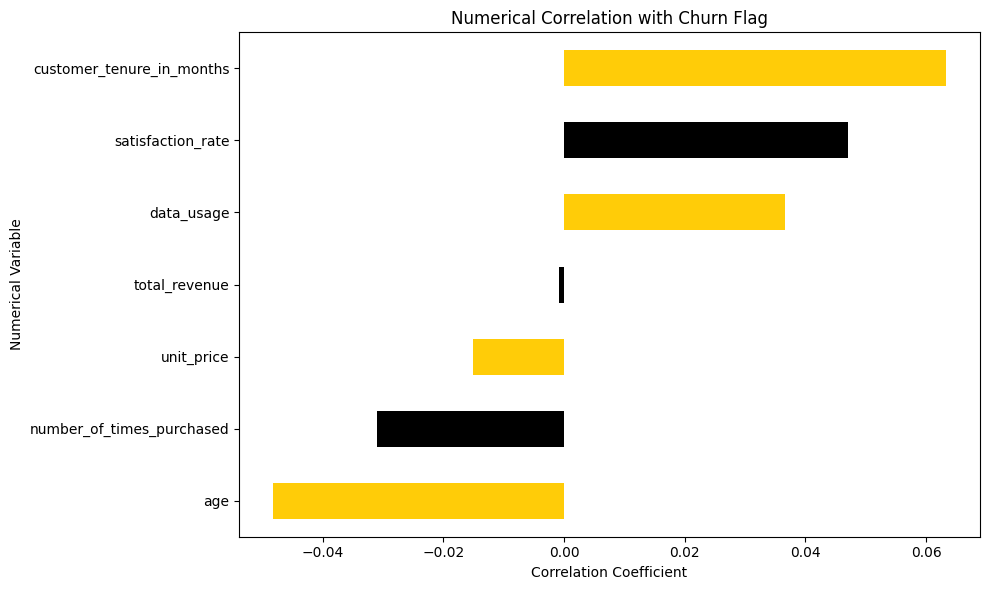

In [ ]:
# a bar plot to visualize the correlation between numerical variables and the churn flag
plt.figure(figsize=(10,6))
churn_corr.drop('churn_flag').sort_values().plot(kind='barh', color=["#FFCC08","black"])
plt.title("Numerical Correlation with Churn Flag")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Numerical Variable")
plt.tight_layout()
plt.show()

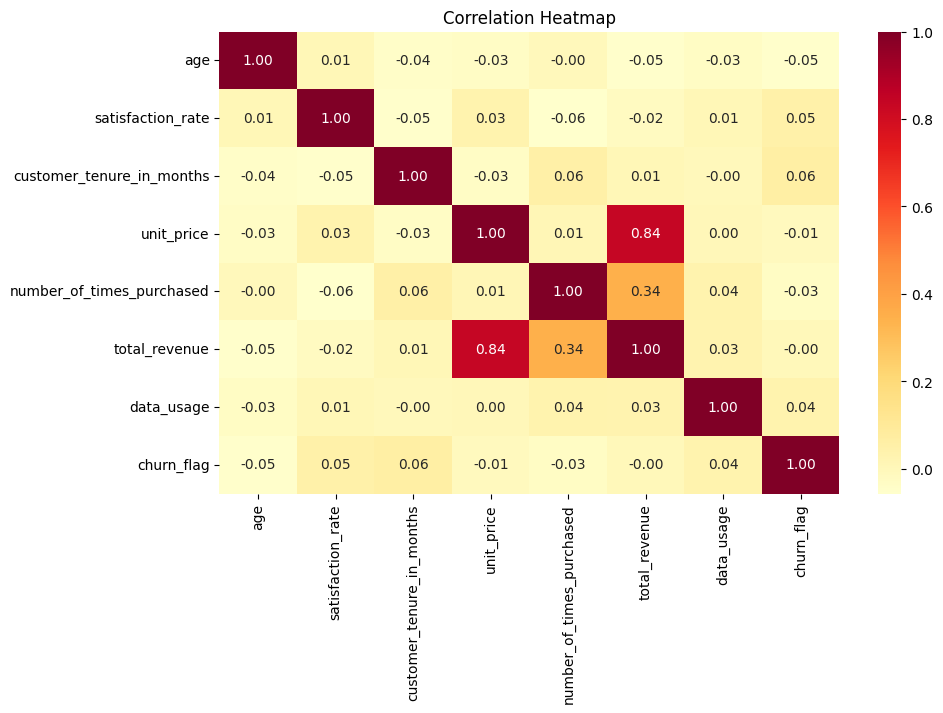

In [ ]:
# a heatmap to visualize the correlation between numerical variables and the churn flag
plt.figure(figsize=(10,6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='YlOrRd', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

##### Based on the count plots for each numerical variable, here are some insights regarding their relationship with customer churn:

*   **Age**: Churn appears to be distributed across all age groups, with no clearly dominant age range for churned customers.
*   **Satisfaction Rate**: Customers with lower satisfaction rates (1 and 2) show a higher proportion of churn compared to those with higher satisfaction rates (3, 4, and 5). Higher satisfaction rates are associated with a larger number of non-churned customers.
*   **Customer Tenure in Months**: Churn is observed across various tenure lengths. There isn't a strong linear relationship, but churn is present even among customers with longer tenure, suggesting factors beyond just the duration of the subscription are at play.
*   **Unit Price**: Churn is seen across different unit price points. Some price points with a high number of customers also show a significant number of churned customers.
*   **Number of Times Purchased**: Churn is present for customers with varying numbers of purchases. There's no clear trend indicating that more purchases directly correlate with lower or higher churn.
*   **Data Usage**: Churn is spread across different data usage levels. It's difficult to discern a strong pattern from this plot alone due to the granularity of the data usage values.
*   **Month of Purchase**: The plots show the distribution of churn across the months in the dataset (January, February, and March 2025). February had the highest number of customers overall, and consequently, the highest number of both churned and non-churned customers in absolute terms within this period.

# Data Analysis Key Findings

####   When grouped by 'mtn\_device', 'Modem' generated the highest total revenue, followed by 'Router', and then 'Decoder'.
*   There are 690 customers with a 'No' churn status and 284 customers with a 'Yes' churn status.
*   The 'Basic Plan' is the most common subscription plan, followed by 'Standard Plan' and 'Premium Plan'.
*   The total revenue generated from subscriptions is approximately 200,000,000 Naira.
*   The average unit price of subscription plans is approximately 19192.02 Naira.
*   61.8% of customers subscribe below the average unit price, while 38.2% subscribe above it.
*   The correlation analysis shows that 'customer\_tenure\_in\_months' has the strongest positive correlation with 'churn\_flag' among numerical features, although the correlation is weak (0.06) and
**Reasons for Churn:** has the strongest relationship with churn (Cramer's V = 1.000), While State: The customer's state shows a moderate, statistically significant relationship with churn (Cramer's V = 0.255, p-value = 0.0016).
*   Customers with the 'Premium Plan' and 'Basic Plan' have a higher count of churned customers compared to the 'Standard Plan'.
*   The box plot indicates that churned customers tend to have a shorter tenure compared to non-churned customers.

# Data preprocessing

# 1. Feature Selection and Engineering

In [ ]:
df1 = df.copy()
df1

,full_name,date_of_purchase,age,state,mtn_device,gender,satisfaction_rate,customer_review,customer_tenure_in_months,subscription_plan,unit_price,number_of_times_purchased,total_revenue,data_usage,customer_churn_status,reasons_for_churn,month_of_purchase,churn_flag
0,Ngozi Berry,2025-01-01,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation,January,1
1,Zainab Baker,2025-03-01,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors,March,1
2,Saidu Evans,2025-03-01,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,still active,March,0
3,Saidu Evans,2025-03-01,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,still active,March,0
4,Saidu Evans,2025-03-01,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,still active,March,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Shehu Harris,2025-01-01,72,Osun,4G Router,Female,3,Good,42,25GB Monthly Plan,9000,7,63000,8.14,No,still active,January,0
970,Tega Hood,2025-03-01,41,Bayelsa,5G Broadband Router,Female,2,Fair,20,30GB Monthly Broadband Plan,9000,10,90000,154.13,No,still active,March,0
971,Oghene Hamilton,2025-02-01,67,Kebbi,4G Router,Male,4,Very Good,31,165GB Monthly Plan,35000,15,525000,144.64,Yes,High Call Tarriffs,February,1
972,Oghene Hamilton,2025-02-01,67,Kebbi,Mobile SIM Card,Male,4,Very Good,31,7GB Monthly Plan,3500,11,38500,158.49,Yes,High Call Tarriffs,February,1


In [ ]:
age_range=[]
for i in df1['age']:
   if i <= 19:
       i = 'teen'
       age_range.append(i)
   elif i <=40:
       i = 'young_adult'
       age_range.append(i)
   else:
       i = 'adult'
       age_range.append(i)

In [ ]:
df1['age_range'] = age_range
display(df1.head())

,full_name,date_of_purchase,age,state,mtn_device,gender,satisfaction_rate,customer_review,customer_tenure_in_months,subscription_plan,unit_price,number_of_times_purchased,total_revenue,data_usage,customer_churn_status,reasons_for_churn,month_of_purchase,churn_flag,age_range
0,Ngozi Berry,2025-01-01,27,Kwara,4G Router,Male,2,Fair,2,165GB Monthly Plan,35000,19,665000,44.48,Yes,Relocation,January,1,young_adult
1,Zainab Baker,2025-03-01,16,Abuja (FCT),Mobile SIM Card,Female,2,Fair,22,12.5GB Monthly Plan,5500,12,66000,19.79,Yes,Better Offers from Competitors,March,1,teen
2,Saidu Evans,2025-03-01,21,Sokoto,5G Broadband Router,Male,1,Poor,60,150GB FUP Monthly Unlimited,20000,8,160000,9.64,No,still active,March,0,young_adult
3,Saidu Evans,2025-03-01,21,Sokoto,Mobile SIM Card,Male,1,Poor,60,1GB+1.5mins Daily Plan,500,8,4000,197.05,No,still active,March,0,young_adult
4,Saidu Evans,2025-03-01,21,Sokoto,Broadband MiFi,Male,1,Poor,60,30GB Monthly Broadband Plan,9000,15,135000,76.34,No,still active,March,0,young_adult


In [ ]:
df1.drop(['full_name','unit_price','total_revenue', 'date_of_purchase', 'age',
'customer_review', 'customer_churn_status'],
      axis=1, inplace=True)

In [ ]:
df1

,state,mtn_device,gender,satisfaction_rate,customer_tenure_in_months,subscription_plan,number_of_times_purchased,data_usage,reasons_for_churn,month_of_purchase,churn_flag,age_range
0,Kwara,4G Router,Male,2,2,165GB Monthly Plan,19,44.48,Relocation,January,1,young_adult
1,Abuja (FCT),Mobile SIM Card,Female,2,22,12.5GB Monthly Plan,12,19.79,Better Offers from Competitors,March,1,teen
2,Sokoto,5G Broadband Router,Male,1,60,150GB FUP Monthly Unlimited,8,9.64,still active,March,0,young_adult
3,Sokoto,Mobile SIM Card,Male,1,60,1GB+1.5mins Daily Plan,8,197.05,still active,March,0,young_adult
4,Sokoto,Broadband MiFi,Male,1,60,30GB Monthly Broadband Plan,15,76.34,still active,March,0,young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
969,Osun,4G Router,Female,3,42,25GB Monthly Plan,7,8.14,still active,January,0,adult
970,Bayelsa,5G Broadband Router,Female,2,20,30GB Monthly Broadband Plan,10,154.13,still active,March,0,adult
971,Kebbi,4G Router,Male,4,31,165GB Monthly Plan,15,144.64,High Call Tarriffs,February,1,adult
972,Kebbi,Mobile SIM Card,Male,4,31,7GB Monthly Plan,11,158.49,High Call Tarriffs,February,1,adult


In [ ]:
frame = pd.DataFrame

In [ ]:
frame(df1.columns)

,0
0,state
1,mtn_device
2,gender
3,satisfaction_rate
4,customer_tenure_in_months
5,subscription_plan
6,number_of_times_purchased
7,data_usage
8,reasons_for_churn
9,month_of_purchase


In [ ]:
numerical_cols = df1.select_dtypes(np.number)
categorical_cols = df1.select_dtypes('object')

In [ ]:
categorical_cols

,state,mtn_device,gender,subscription_plan,reasons_for_churn,month_of_purchase,age_range
0,Kwara,4G Router,Male,165GB Monthly Plan,Relocation,January,young_adult
1,Abuja (FCT),Mobile SIM Card,Female,12.5GB Monthly Plan,Better Offers from Competitors,March,teen
2,Sokoto,5G Broadband Router,Male,150GB FUP Monthly Unlimited,still active,March,young_adult
3,Sokoto,Mobile SIM Card,Male,1GB+1.5mins Daily Plan,still active,March,young_adult
4,Sokoto,Broadband MiFi,Male,30GB Monthly Broadband Plan,still active,March,young_adult
...,...,...,...,...,...,...,...
969,Osun,4G Router,Female,25GB Monthly Plan,still active,January,adult
970,Bayelsa,5G Broadband Router,Female,30GB Monthly Broadband Plan,still active,March,adult
971,Kebbi,4G Router,Male,165GB Monthly Plan,High Call Tarriffs,February,adult
972,Kebbi,Mobile SIM Card,Male,7GB Monthly Plan,High Call Tarriffs,February,adult


In [ ]:
numerical_cols.head()

,satisfaction_rate,customer_tenure_in_months,number_of_times_purchased,data_usage,churn_flag
0,2,2,19,44.48,1
1,2,22,12,19.79,1
2,1,60,8,9.64,0
3,1,60,8,197.05,0
4,1,60,15,76.34,0


##### I dropped redundant and irrelevant features like 'customer_id, full_name, and for customer_churn_status since I mapped it into {1:Yes, 0:No}. I also removed The number_of_time_purchased, unit_price because they contributed the same value as total_revenue'

# Churn Analysis by Different Variables

To analyzes the churn status based on different variables to identify potential factors influencing customer churn.

# Logistic Regression Assumption Checks, that includes:

- multicollinearity
- independence of observation
- Linearity with log-odds

##**1. CHECK MULTICOLLINEARITY**
  
  Check for multicollinearity using VIF.
  
    Rules:
*   VIF < 5: No multicollinearity
*   VIF > 5: Multicollinearity problem

In [ ]:
def check_multicollinearity(X, threshold=5.0):
    # To Calculate VIF
    vif_results = pd.DataFrame()
    vif_results['Feature'] = X.columns
    vif_results['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    # Plot
    plt.figure(figsize=(16, 8))
    bars = plt.bar(vif_results['Feature'], vif_results['VIF'])
    plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold = {threshold}')
    plt.xlabel('Features')
    plt.ylabel('VIF')
    plt.title('Multicollinearity Check')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return vif_results

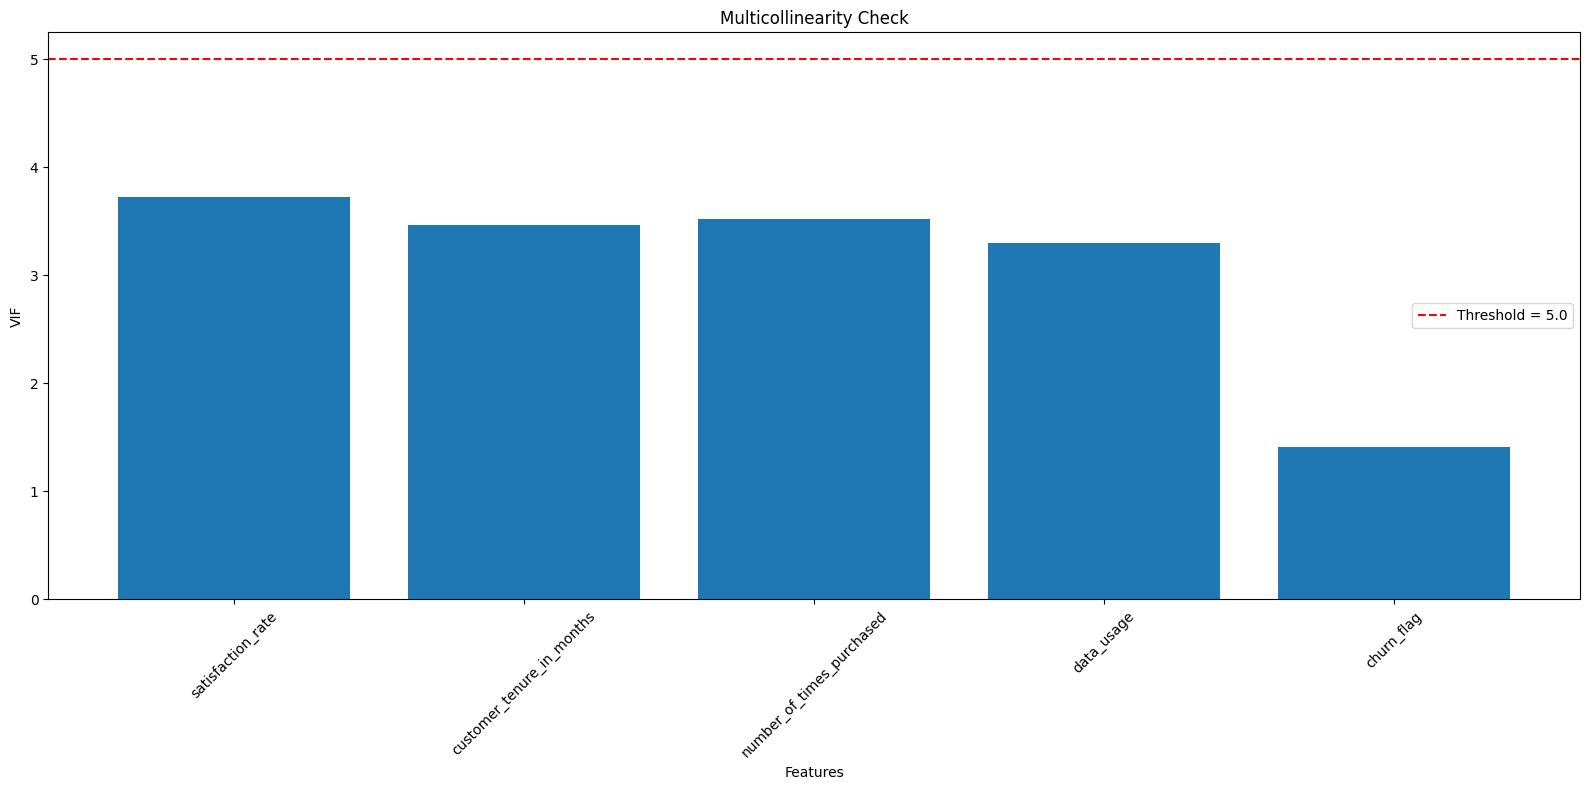

,Feature,VIF
0,satisfaction_rate,3.726225
1,customer_tenure_in_months,3.467446
2,number_of_times_purchased,3.518564
3,data_usage,3.304292
4,churn_flag,1.408851


In [ ]:
check_multicollinearity(numerical_cols)

## **2. CHECK LINEARITY**

In [ ]:
def check_linearity(X, y, feature_names=None):
    """
     if features have linear relationship with log-odds.

    Usage:
    check_linearity(X_train, y_train, feature_names=['age', 'income'])
    """
    print("LINEARITY CHECK")
    print("=" * 20)

    n_features = X.shape[1]
    n_cols = min(3, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_features == 1:
        axes = [axes]
    elif n_rows == 1 and n_cols > 1:
        axes = list(axes)
    elif n_rows > 1:
        axes = axes.flatten()

    results = []

    for i, feature in enumerate(X.columns):
        if i >= len(axes):
            break

        x_values = X.iloc[:, i].values

        try:
            # Create bins for continuous variables
            bins = pd.qcut(x_values, q=10, duplicates='drop')
            binned_data = pd.DataFrame({'x': x_values, 'y': y, 'bins': bins})
            grouped = binned_data.groupby('bins').agg({
                'x': 'mean',
                'y': ['count', 'sum']
            })

            grouped.columns = ['x_mean', 'count', 'success']
            grouped = grouped[grouped['count'] > 0]  # Remove empty bins

            # Calculate empirical logits (avoid log(0))
            p = (grouped['success'] + 0.5) / (grouped['count'] + 1)
            logits = np.log(p / (1 - p))

            # Plot
            axes[i].scatter(grouped['x_mean'], logits, alpha=0.7)

            # Fit line to show trend
            if len(grouped) > 1:
                z = np.polyfit(grouped['x_mean'], logits, 1)
                p_line = np.poly1d(z)
                axes[i].plot(grouped['x_mean'], p_line(grouped['x_mean']), "r--", alpha=0.8)

                # Simple linearity check (R-squared)
                y_pred = p_line(grouped['x_mean'])
                ss_res = np.sum((logits - y_pred) ** 2)
                ss_tot = np.sum((logits - np.mean(logits)) ** 2)
                r_squared = 1 - (ss_res / ss_tot) if ss_tot != 0 else 0

                if r_squared > 0.7:
                    status = "✓ Linear"
                else:
                    status = "✗ Non-linear"

                results.append(f"{feature}: {status} (R² = {r_squared:.3f})")

        except Exception as e:
            # Fallback: simple scatter
            axes[i].scatter(x_values, y, alpha=0.3)
            results.append(f"{feature}: Unable to test - {str(e)[:30]}")

        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Log-odds')
        axes[i].set_title(f'Linearity: {feature}')

    # Hide unused subplots
    for i in range(len(X.columns), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Print results
    print("Results:")
    for result in results:
        print(f"  {result}")

    print("\nInterpretation:")
    print("- Look for straight lines in the plots")
    print("- Curved lines suggest need for feature transformation")
    print("- Consider log, polynomial, or other transformations for non-linear features")

    return results

LINEARITY CHECK


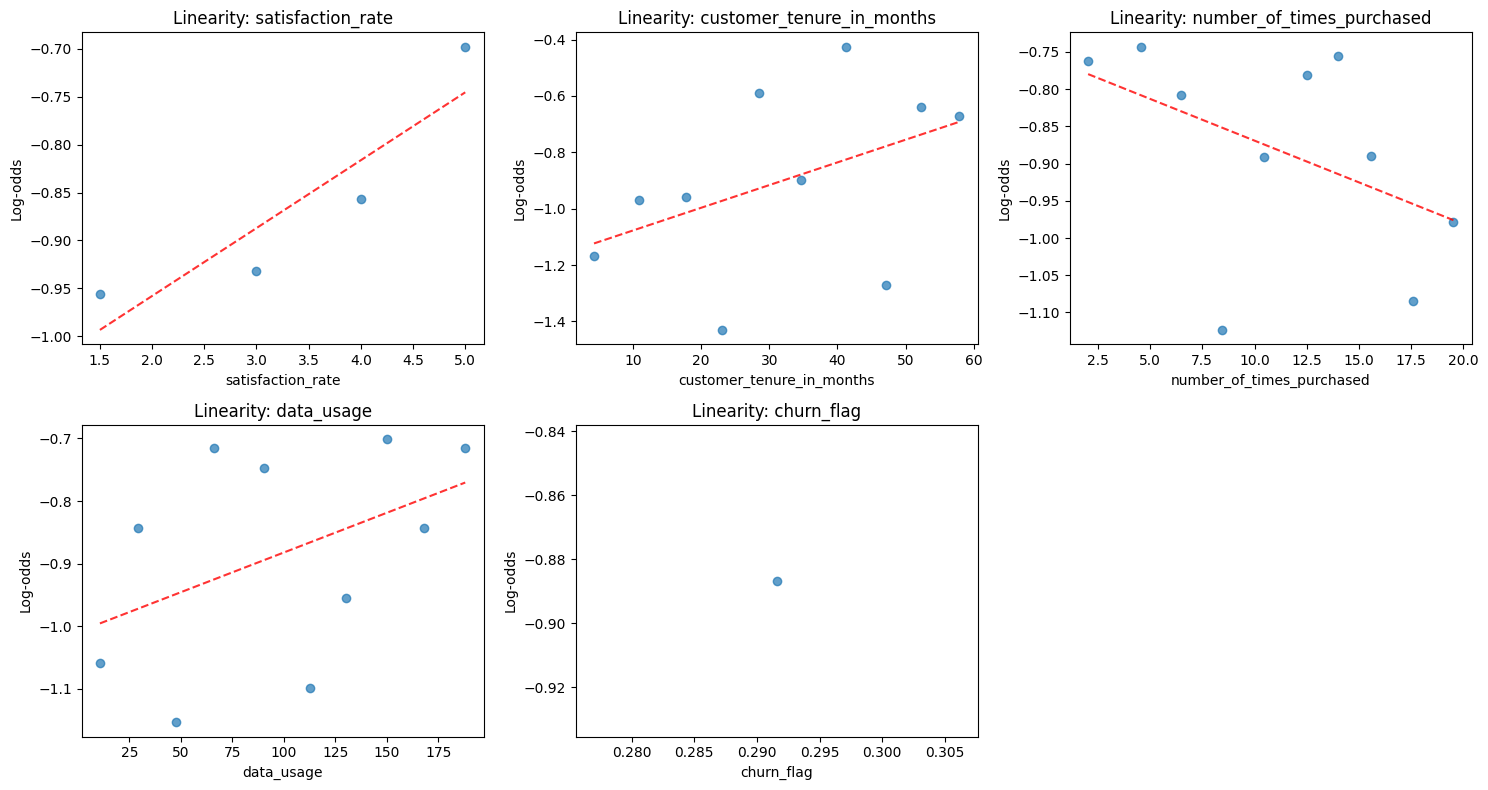

Results:
  satisfaction_rate: ✓ Linear (R² = 0.822)
  customer_tenure_in_months: ✗ Non-linear (R² = 0.200)
  number_of_times_purchased: ✗ Non-linear (R² = 0.215)
  data_usage: ✗ Non-linear (R² = 0.199)

Interpretation:
- Look for straight lines in the plots
- Curved lines suggest need for feature transformation
- Consider log, polynomial, or other transformations for non-linear features


['satisfaction_rate: ✓ Linear (R² = 0.822)',
 'customer_tenure_in_months: ✗ Non-linear (R² = 0.200)',
 'number_of_times_purchased: ✗ Non-linear (R² = 0.215)',
 'data_usage: ✗ Non-linear (R² = 0.199)']

In [ ]:
check_linearity(numerical_cols, df1['churn_flag'])

# **Model Training**

In [ ]:
df1

,state,mtn_device,gender,satisfaction_rate,customer_tenure_in_months,subscription_plan,number_of_times_purchased,data_usage,reasons_for_churn,month_of_purchase,churn_flag,age_range
0,Kwara,4G Router,Male,2,2,165GB Monthly Plan,19,44.48,Relocation,January,1,young_adult
1,Abuja (FCT),Mobile SIM Card,Female,2,22,12.5GB Monthly Plan,12,19.79,Better Offers from Competitors,March,1,teen
2,Sokoto,5G Broadband Router,Male,1,60,150GB FUP Monthly Unlimited,8,9.64,still active,March,0,young_adult
3,Sokoto,Mobile SIM Card,Male,1,60,1GB+1.5mins Daily Plan,8,197.05,still active,March,0,young_adult
4,Sokoto,Broadband MiFi,Male,1,60,30GB Monthly Broadband Plan,15,76.34,still active,March,0,young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...
969,Osun,4G Router,Female,3,42,25GB Monthly Plan,7,8.14,still active,January,0,adult
970,Bayelsa,5G Broadband Router,Female,2,20,30GB Monthly Broadband Plan,10,154.13,still active,March,0,adult
971,Kebbi,4G Router,Male,4,31,165GB Monthly Plan,15,144.64,High Call Tarriffs,February,1,adult
972,Kebbi,Mobile SIM Card,Male,4,31,7GB Monthly Plan,11,158.49,High Call Tarriffs,February,1,adult


In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop(['churn_flag', 'reasons_for_churn'], axis=1)
y = df1['churn_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X.shape)
print(y.shape)

(974, 10)
(974,)


In [ ]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
scaler = StandardScaler()

In [ ]:
numerical_cols_to_scale = X_train.select_dtypes(np.number).columns

X_train_numerical = X_train[numerical_cols_to_scale]

X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)

In [ ]:
categorical_cols_to_encode = X_train.select_dtypes(object).columns

X_train_categorical = X_train[categorical_cols_to_encode]

X_train_categorical_encoded = ohe.fit_transform(X_train_categorical)

In [ ]:
encoded_df = frame(X_train_categorical_encoded, columns=ohe.get_feature_names_out(categorical_cols_to_encode), index=X_train.index)
encoded_df.head()

,state_Abia,state_Abuja (FCT),state_Adamawa,state_Akwa Ibom,state_Anambra,state_Bauchi,state_Bayelsa,state_Benue,state_Borno,state_Cross River,...,subscription_plan_500MB Daily Plan,subscription_plan_60GB Monthly Broadband Plan,subscription_plan_65GB Monthly Plan,subscription_plan_7GB Monthly Plan,month_of_purchase_February,month_of_purchase_January,month_of_purchase_March,age_range_adult,age_range_teen,age_range_young_adult
924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
927,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
228,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:

X_test_num_to_scale = X_test.select_dtypes(np.number).columns

X_test_numerical = X_test[X_test_num_to_scale]

X_test_numerical_scaled = scaler.transform(X_test_numerical)

In [ ]:
cat_cols_to_encode = X_test.select_dtypes(object).columns

X_test_categorical = X_test[cat_cols_to_encode]

X_test_categorical_encoded = ohe.transform(X_test_categorical)

In [ ]:
X_train_processed = np.concatenate([X_train_numerical_scaled, X_train_categorical_encoded], axis=1)

X_test_processed = np.concatenate([X_test_numerical_scaled, X_test_categorical_encoded], axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train_processed, y_train)

LogisticRegression(class_weight='balanced')

##**Prediction**

In [ ]:
y_test_pred = model.predict(X_test_processed)

In [ ]:
result = frame({'Actual': y_test, 'Predicted': y_test_pred})
result

,Actual,Predicted
199,0,1
539,1,0
174,1,0
465,0,0
66,0,1
...,...,...
433,1,1
893,0,0
909,0,0
889,1,0


In [ ]:
print(result.loc[result['Actual'] != result['Predicted'],:].sum())

Actual       40
Predicted    80
dtype: int64


## **Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,ConfusionMatrixDisplay

accuracy_score(y_test, y_test_pred)

0.590443686006826

In [ ]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[129,  80],
       [ 40,  44]])

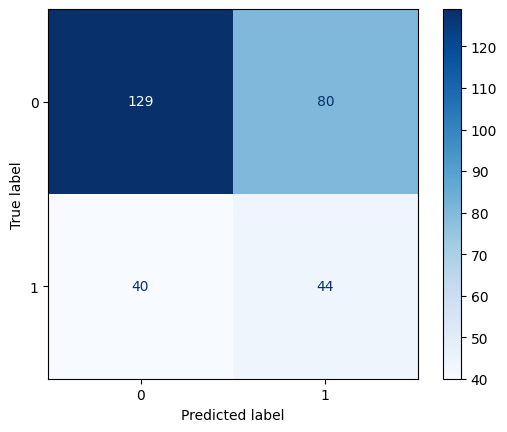

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
frame(classification_report(y_test, y_test_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.763314,0.354839,0.590444,0.559076,0.646208
recall,0.617225,0.523810,0.590444,0.570517,0.590444
f1-score,0.682540,0.423077,0.590444,0.552808,0.608154
support,209.000000,84.000000,0.590444,293.000000,293.000000


# **3. CHECK INDEPENDENCE (Run AFTER training your model)**

##def check_independence(model, X, y):
    """
    Check independence using residual patterns.
    
    Usage:
    model = LogisticRegression().fit(X_train, y_train)
    check_independence(model, X_train, y_train)
    
    Rules:
    - Random residual pattern: Independent ✓
    - Clear pattern in residuals: Not independent ✗
    """
    from statsmodels.stats.diagnostic import durbin_watson
    
    # Get predictions and residuals
    y_pred_proba = model.predict_proba(X)[:, 1]
    residuals = (y - y_pred_proba) / np.sqrt(y_pred_proba * (1 - y_pred_proba))
    
    # Durbin-Watson test
    dw_stat = durbin_watson(residuals)
    
    print("INDEPENDENCE CHECK")
    print("=" * 40)
    print(f"Durbin-Watson statistic: {dw_stat:.3f}")
    print("Rule: 1.5 < DW < 2.5 indicates independence")
    
    if 1.5 < dw_stat < 2.5:
        print("✓ PASSED: Observations appear independent")
    else:
        print("✗ FAILED: Possible autocorrelation detected")
        print("Fix: Check data order, add time features, or use different model")
    
    # Plot residuals
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Residuals vs fitted
    ax1.scatter(y_pred_proba, residuals, alpha=0.6)
    ax1.axhline(y=0, color='red', linestyle='--')
    ax1.set_xlabel('Predicted Probability')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residuals vs Fitted')
    
    # Residuals over time/order
    ax2.plot(residuals, alpha=0.7)
    ax2.axhline(y=0, color='red', linestyle='--')
    ax2.set_xlabel('Observation Order')
    ax2.set_ylabel('Residuals')
    ax2.set_title(f'Residuals Over Time (DW = {dw_stat:.3f})')
    
    plt.tight_layout()
    plt.show()
    
    return dw_stat

In [ ]:
y_test_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1])

In [ ]:
y_test

,churn_flag
199,0
539,1
174,1
465,0
66,0
...,...
433,1
893,0
909,0
889,1


In [ ]:
y_train

,churn_flag
924,1
927,0
428,0
424,0
228,1
...,...
106,1
270,0
860,1
435,0
